In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
from typing import List
import numpy as np
import sasc.generate_helper
import sasc.viz
from pprint import pprint
import joblib
from collections import defaultdict
from sasc.config import RESULTS_DIR, REPO_DIR, CACHE_DIR
from typing import Tuple
import sys
import json

sys.path.append(join(REPO_DIR, "notebooks_stories", "0_voxel_select"))
import get_voxels
subject = "UTS03"

# 5 pairs of voxels

### Select voxels
Based on their similarity to predicted ngrams

In [2]:
cache_ngrams = joblib.load(join(CACHE_DIR, 'cache_ngrams', f'fmri_{subject}.pkl'))

In [3]:
rows = get_voxels.get_rows_voxels(subject=subject, setting='default')

# drop 7 voxels with worse performance
# worst_voxels = [368, 342, 248, 179, 155, 154, 168]
# rows = rows[~rows.module_num.isin(worst_voxels)]
cache_ngrams_mod = cache_ngrams[:, rows.module_num.values]

len(voxel_nums) 17 nunique 17


/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage
/home/chansingh/imodelsx/.venv/lib/python3.11/site-packages/seaborn/matrix.py:495: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self.linkage = self.calculated_linkage


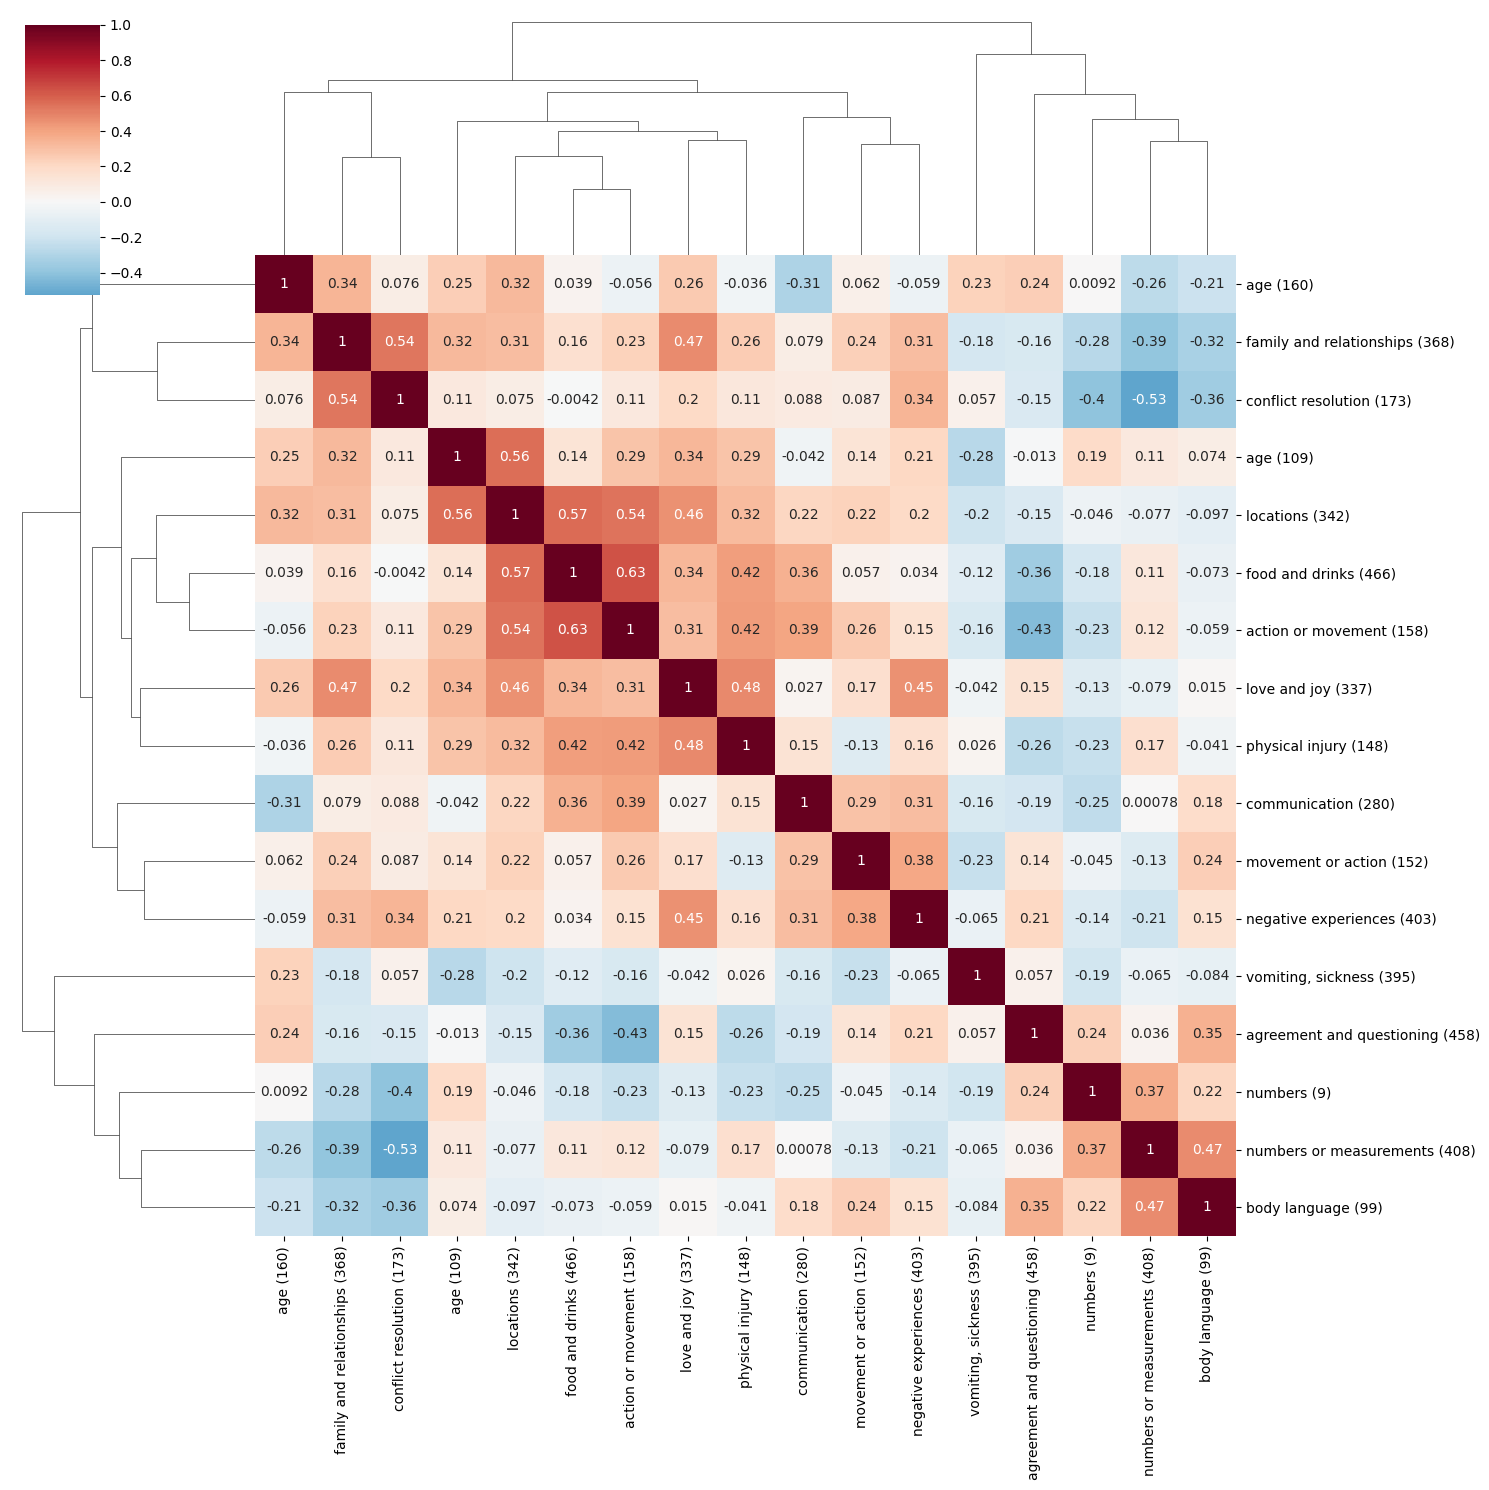

In [5]:
# get correlations of every column with every other column
corrs = np.corrcoef(cache_ngrams_mod, rowvar=False)

# plt.imshow(corrs)
# plt.yticks(np.arange(len(rows)), rows.expl.values)
# plt.xticks(np.arange(len(rows)), rows.expl.values, rotation=90)

df = pd.DataFrame(corrs)
val = rows.expl + " (" + rows.module_num.astype(str) + ")"
df.columns = val
df.index = val
# sns.heatmap(df, annot=True)
sns.clustermap(df, cmap='RdBu_r', center=0, figsize=(15, 15), annot=True)

plt.show()

In [6]:
pairs = [
    # very related (0.63)
    (466, 158),  # food and drinks, action or movement
    # pretty related (0.38)
    (152, 403),  # movement or action, negative experiences
    # medium (0.24)
    (458, 9), # agreement and questioning, numbers
    # low (0.1)
    (173, 109), # conflict resolution, age
    # very low (~0)
    (342, 99), # locations, body language
]